# Pandas
***pandas*** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

Source: http://pandas.pydata.org/pandas-docs/stable/

# 10 Minutes to pandas
This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the Cookbook
The original document is posted at http://pandas.pydata.org/pandas-docs/stable/10min.html

Customarily, we import as follows:

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation
See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro)

Creating a `Series` by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a `DataFrame` by passing a numpy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.963394,0.308091,-1.549268,0.659767
2013-01-02,1.778638,-1.338972,0.572253,0.550902
2013-01-03,0.847391,0.133701,-0.718947,-0.876682
2013-01-04,-1.071039,0.442848,-0.576122,-0.339758
2013-01-05,0.414881,-1.061210,-0.549216,-0.096576
2013-01-06,1.778033,-0.302979,-0.320203,-0.431450


In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
   ....:                      'B' : pd.Timestamp('20130102'),
   ....:                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
   ....:                      'D' : np.array([3] * 4,dtype='int32'),
   ....:                      'E' : pd.Categorical(["test","train","test","train"]),
   ....:                      'F' : 'foo' })
   ....: 

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific `dtypes`

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [ ]:
Out[12]: 
A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:
<pre>
In [13]: df2.&lt;TAB&gt;
df2.A                  df2.boxplot
df2.abs                df2.C
df2.add                df2.clip
df2.add_prefix         df2.clip_lower
df2.add_suffix         df2.clip_upper
df2.align              df2.columns
df2.all                df2.combine
df2.any                df2.combineAdd
df2.append             df2.combine_first
df2.apply              df2.combineMult
df2.applymap           df2.compound
df2.as_blocks          df2.consolidate
df2.asfreq             df2.convert_objects
df2.as_matrix          df2.copy
df2.astype             df2.corr
df2.at                 df2.corrwith
df2.at_time            df2.count
df2.axes               df2.cov
df2.B                  df2.cummax
df2.between_time       df2.cummin
df2.bfill              df2.cumprod
df2.blocks             df2.cumsum
df2.bool               df2.D
</pre>
As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

# Viewing Data
See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics)

See the top & bottom rows of the frame

In [8]:
df.head()

,A,B,C,D
2013-01-01,-1.963394,0.308091,-1.549268,0.659767
2013-01-02,1.778638,-1.338972,0.572253,0.550902
2013-01-03,0.847391,0.133701,-0.718947,-0.876682
2013-01-04,-1.071039,0.442848,-0.576122,-0.339758
2013-01-05,0.414881,-1.061210,-0.549216,-0.096576


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.071039,0.442848,-0.576122,-0.339758
2013-01-05,0.414881,-1.061210,-0.549216,-0.096576
2013-01-06,1.778033,-0.302979,-0.320203,-0.431450


In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
df.values

array([[-1.96339396,  0.30809147, -1.54926833,  0.65976666],
       [ 1.77863781, -1.33897158,  0.572253  ,  0.55090191],
       [ 0.84739149,  0.13370052, -0.71894681, -0.87668207],
       [-1.07103911,  0.44284818, -0.57612176, -0.33975755],
       [ 0.41488125, -1.06121031, -0.5492159 , -0.0965764 ],
       [ 1.77803347, -0.30297865, -0.32020278, -0.43144989]])

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.297418,-0.303087,-0.523584,-0.088966
std,1.528820,0.744117,0.683496,0.595110
min,-1.963394,-1.338972,-1.549268,-0.876682
25%,-0.699559,-0.871652,-0.683241,-0.408527
50%,0.631136,-0.084639,-0.562669,-0.218167
75%,1.545373,0.264494,-0.377456,0.389032
max,1.778638,0.442848,0.572253,0.659767


Transposing your data

In [14]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.963394,1.778638,0.847391,-1.071039,0.414881,1.778033
B,0.308091,-1.338972,0.133701,0.442848,-1.061210,-0.302979
C,-1.549268,0.572253,-0.718947,-0.576122,-0.549216,-0.320203
D,0.659767,0.550902,-0.876682,-0.339758,-0.096576,-0.431450


Sorting by an axis

In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.659767,-1.549268,0.308091,-1.963394
2013-01-02,0.550902,0.572253,-1.338972,1.778638
2013-01-03,-0.876682,-0.718947,0.133701,0.847391
2013-01-04,-0.339758,-0.576122,0.442848,-1.071039
2013-01-05,-0.096576,-0.549216,-1.061210,0.414881
2013-01-06,-0.431450,-0.320203,-0.302979,1.778033


Sorting by values

In [27]:
df.sort_values(by='B', ascending=True)

,A,B,C,D
2013-01-02,1.778638,-1.338972,0.572253,0.550902
2013-01-05,0.414881,-1.061210,-0.549216,-0.096576
2013-01-06,1.778033,-0.302979,-0.320203,-0.431450
2013-01-03,0.847391,0.133701,-0.718947,-0.876682
2013-01-01,-1.963394,0.308091,-1.549268,0.659767
2013-01-04,-1.071039,0.442848,-0.576122,-0.339758


# Selection
***Note:*** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, `.at`, .`iat`, `.loc`, `.iloc` and `.ix`.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

## Getting

Selecting a single column, which yields a `Series`, equivalent to `df.A`

In [18]:
df['A']

2013-01-01   -1.963394
2013-01-02    1.778638
2013-01-03    0.847391
2013-01-04   -1.071039
2013-01-05    0.414881
2013-01-06    1.778033
Freq: D, Name: A, dtype: float64

Out[23]: 
2013-01-01    0.469112
2013-01-02    1.212112
2013-01-03   -0.861849
2013-01-04    0.721555
2013-01-05   -0.424972
2013-01-06   -0.673690
Freq: D, Name: A, dtype: float64
Selecting via [], which slices the rows.

In [19]:
df[0:3]

,A,B,C,D
2013-01-01,-1.963394,0.308091,-1.549268,0.659767
2013-01-02,1.778638,-1.338972,0.572253,0.550902
2013-01-03,0.847391,0.133701,-0.718947,-0.876682


In [20]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.778638,-1.338972,0.572253,0.550902
2013-01-03,0.847391,0.133701,-0.718947,-0.876682
2013-01-04,-1.071039,0.442848,-0.576122,-0.339758


## Selection by Label

See more in [Selection by Label](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)

For getting a cross section using a label

In [22]:
dates[0]

Timestamp('2013-01-01 00:00:00', offset='D')

In [21]:
df.loc[dates[0]]

A   -1.963394
B    0.308091
C   -1.549268
D    0.659767
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [28]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-1.963394,0.308091
2013-01-02,1.778638,-1.338972
2013-01-03,0.847391,0.133701
2013-01-04,-1.071039,0.442848
2013-01-05,0.414881,-1.061210
2013-01-06,1.778033,-0.302979


Showing label slicing, both endpoints are *included*

In [29]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.778638,-1.338972
2013-01-03,0.847391,0.133701
2013-01-04,-1.071039,0.442848


Reduction in the dimensions of the returned object

In [31]:
df.loc['20130102',['A','B']]

A    1.778638
B   -1.338972
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [32]:
df.loc[dates[0],'A']

-1.9633939641019942

For getting fast access to a scalar (equiv to the prior method)

In [33]:
df.at[dates[0],'A']

-1.9633939641019942

## Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [34]:
df.iloc[3]

A   -1.071039
B    0.442848
C   -0.576122
D   -0.339758
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [35]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.071039,0.442848
2013-01-05,0.414881,-1.061210


By lists of integer position locations, similar to the numpy/python style

In [36]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.778638,0.572253
2013-01-03,0.847391,-0.718947
2013-01-05,0.414881,-0.549216


For slicing rows explicitly

In [37]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.778638,-1.338972,0.572253,0.550902
2013-01-03,0.847391,0.133701,-0.718947,-0.876682


Out[35]: 
                   A         B         C         D
2013-01-02  1.212112 -0.173215  0.119209 -1.044236
2013-01-03 -0.861849 -2.104569 -0.494929  1.071804

For slicing columns explicitly

In [38]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.308091,-1.549268
2013-01-02,-1.338972,0.572253
2013-01-03,0.133701,-0.718947
2013-01-04,0.442848,-0.576122
2013-01-05,-1.061210,-0.549216
2013-01-06,-0.302979,-0.320203


For getting a value explicitly

In [ ]:
In [37]: df.iloc[1,1]
Out[37]: -0.17321464905330858
For getting fast access to a scalar (equiv to the prior method)

In [38]: df.iat[1,1]
Out[38]: -0.17321464905330858

## Boolean Indexing

Using a single column’s values to select data.

In [48]:
In [39]: df[df.A > 0]

,A,B,C,D,F
2013-01-02,1.778638,-1.338972,0.572253,0.550902,1.0
2013-01-03,0.847391,0.133701,-0.718947,-0.876682,2.0
2013-01-05,0.414881,-1.061210,-0.549216,-0.096576,4.0
2013-01-06,1.778033,-0.302979,-0.320203,-0.431450,5.0


A `where` operation for getting.

In [49]:
df[df > 0]

,A,B,C,D,F
2013-01-01,NaN,0.308091,NaN,0.659767,NaN
2013-01-02,1.778638,NaN,0.572253,0.550902,1.0
2013-01-03,0.847391,0.133701,NaN,NaN,2.0
2013-01-04,NaN,0.442848,NaN,NaN,3.0
2013-01-05,0.414881,NaN,NaN,NaN,4.0
2013-01-06,1.778033,NaN,NaN,NaN,5.0


Using the `isin()` method for filtering:

In [39]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-1.963394,0.308091,-1.549268,0.659767,one
2013-01-02,1.778638,-1.338972,0.572253,0.550902,one
2013-01-03,0.847391,0.133701,-0.718947,-0.876682,two
2013-01-04,-1.071039,0.442848,-0.576122,-0.339758,three
2013-01-05,0.414881,-1.061210,-0.549216,-0.096576,four
2013-01-06,1.778033,-0.302979,-0.320203,-0.431450,three


In [40]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.847391,0.133701,-0.718947,-0.876682,two
2013-01-05,0.414881,-1.061210,-0.549216,-0.096576,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [42]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [44]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-1.963394,0.308091,-1.549268,0.659767,NaN
2013-01-02,1.778638,-1.338972,0.572253,0.550902,1.0
2013-01-03,0.847391,0.133701,-0.718947,-0.876682,2.0
2013-01-04,-1.071039,0.442848,-0.576122,-0.339758,3.0
2013-01-05,0.414881,-1.061210,-0.549216,-0.096576,4.0
2013-01-06,1.778033,-0.302979,-0.320203,-0.431450,5.0


Setting values by label

In [46]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.308091,-1.549268,0.659767,NaN
2013-01-02,1.778638,-1.338972,0.572253,0.550902,1.0
2013-01-03,0.847391,0.133701,-0.718947,-0.876682,2.0
2013-01-04,-1.071039,0.442848,-0.576122,-0.339758,3.0
2013-01-05,0.414881,-1.061210,-0.549216,-0.096576,4.0
2013-01-06,1.778033,-0.302979,-0.320203,-0.431450,5.0


Setting values by position

In [ ]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [ ]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [47]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.308091,-1.549268,0.659767,NaN
2013-01-02,1.778638,-1.338972,0.572253,0.550902,1.0
2013-01-03,0.847391,0.133701,-0.718947,-0.876682,2.0
2013-01-04,-1.071039,0.442848,-0.576122,-0.339758,3.0
2013-01-05,0.414881,-1.061210,-0.549216,-0.096576,4.0
2013-01-06,1.778033,-0.302979,-0.320203,-0.431450,5.0


A `where` operation with setting.

In [50]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,-0.308091,-1.549268,-0.659767,NaN
2013-01-02,-1.778638,-1.338972,-0.572253,-0.550902,-1.0
2013-01-03,-0.847391,-0.133701,-0.718947,-0.876682,-2.0
2013-01-04,-1.071039,-0.442848,-0.576122,-0.339758,-3.0
2013-01-05,-0.414881,-1.061210,-0.549216,-0.096576,-4.0
2013-01-06,-1.778033,-0.302979,-0.320203,-0.431450,-5.0


# Missing Data
pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations.
See the [Missing Data section]()

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [51]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.308091,-1.549268,0.659767,NaN,1.0
2013-01-02,1.778638,-1.338972,0.572253,0.550902,1.0,1.0
2013-01-03,0.847391,0.133701,-0.718947,-0.876682,2.0,NaN
2013-01-04,-1.071039,0.442848,-0.576122,-0.339758,3.0,NaN


To drop any rows that have missing data.

In [52]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.778638,-1.338972,0.572253,0.550902,1.0,1.0


Filling missing data

In [53]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.308091,-1.549268,0.659767,5.0,1.0
2013-01-02,1.778638,-1.338972,0.572253,0.550902,1.0,1.0
2013-01-03,0.847391,0.133701,-0.718947,-0.876682,2.0,5.0
2013-01-04,-1.071039,0.442848,-0.576122,-0.339758,3.0,5.0


To get the boolean mask where values are `nan`

In [54]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations
See the [Basic section on Binary Ops]()

## Stats

Operations in general exclude missing data.

Performing a descriptive statistic


In [55]:
df.mean()

A    0.624651
B   -0.303087
C   -0.523584
D   -0.088966
F    3.000000
dtype: float64

Same operation on the other axis

In [56]:
df.mean(1)

2013-01-01   -0.145353
2013-01-02    0.512564
2013-01-03    0.277093
2013-01-04    0.291186
2013-01-05    0.541576
2013-01-06    1.144680
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [57]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [58]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.152609,-0.866299,-1.718947,-1.876682,1.0
2013-01-04,-4.071039,-2.557152,-3.576122,-3.339758,0.0
2013-01-05,-4.585119,-6.061210,-5.549216,-5.096576,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply

Applying functions to the data

In [59]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.308091,-1.549268,0.659767,NaN
2013-01-02,1.778638,-1.030880,-0.977015,1.210669,1.0
2013-01-03,2.626029,-0.897180,-1.695962,0.333987,3.0
2013-01-04,1.554990,-0.454331,-2.272084,-0.005771,6.0
2013-01-05,1.969871,-1.515542,-2.821300,-0.102347,10.0
2013-01-06,3.747905,-1.818520,-3.141503,-0.533797,15.0


In [60]:
df.apply(lambda x: x.max() - x.min())

A    2.849677
B    1.781820
C    2.121521
D    1.536449
F    4.000000
dtype: float64

## Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [61]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    3
2    3
3    0
4    6
5    2
6    5
7    3
8    5
9    3
dtype: int64

In [62]:
s.value_counts()

3    4
6    2
5    2
2    1
0    1
dtype: int64

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [63]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
## Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with `concat()`:

In [64]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.130509,-2.604124,0.027616,-0.821968
1,-0.176070,-1.986024,-0.490693,0.029532
2,0.963221,0.835471,-0.798573,-0.851261
3,-0.002985,-0.199293,0.128608,-0.066615
4,0.538951,-2.722110,-0.052032,0.780796
5,0.322941,-1.036370,0.220932,-0.779096
6,0.073308,-0.494124,0.536048,-1.040171
7,0.855705,-1.237751,0.056262,1.283854
8,0.714434,1.442418,-0.841397,0.530934
9,-0.603831,-0.311791,-1.317725,-0.494577


In [65]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.130509,-2.604124,0.027616,-0.821968
1,-0.176070,-1.986024,-0.490693,0.029532
2,0.963221,0.835471,-0.798573,-0.851261
3,-0.002985,-0.199293,0.128608,-0.066615
4,0.538951,-2.722110,-0.052032,0.780796
5,0.322941,-1.036370,0.220932,-0.779096
6,0.073308,-0.494124,0.536048,-1.040171
7,0.855705,-1.237751,0.056262,1.283854
8,0.714434,1.442418,-0.841397,0.530934
9,-0.603831,-0.311791,-1.317725,-0.494577


## Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [66]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [67]:
left

,key,lval
0,foo,1
1,foo,2


In [ ]:
Out[79]: 
   key  lval
0  foo     1
1  foo     2

In [80]: 

In [68]:
right

,key,rval
0,foo,4
1,foo,5


In [ ]:
Out[80]: 
   key  rval
0  foo     4
1  foo     5

In [69]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [70]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.369177,0.994869,0.649943,0.802875
1,-0.818802,-0.950836,-0.943406,-0.795126
2,-2.616980,1.310388,-1.651243,-2.010730
3,1.337582,-0.635927,1.036803,0.529098
4,-1.281876,-0.897534,-0.258860,-1.285143
5,-0.839045,0.014163,-0.534749,-1.436989
6,1.027063,0.576733,1.221615,2.564623
7,0.809128,-0.687894,0.375006,0.391909


In [71]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.369177,0.994869,0.649943,0.802875
1,-0.818802,-0.950836,-0.943406,-0.795126
2,-2.616980,1.310388,-1.651243,-2.010730
3,1.337582,-0.635927,1.036803,0.529098
4,-1.281876,-0.897534,-0.258860,-1.285143
5,-0.839045,0.014163,-0.534749,-1.436989
6,1.027063,0.576733,1.221615,2.564623
7,0.809128,-0.687894,0.375006,0.391909
8,1.337582,-0.635927,1.036803,0.529098


# Grouping
By “group by” we are referring to a process involving one or more of the following steps
- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [72]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ....:                           'foo', 'bar', 'foo', 'foo'],
   ....:                    'B' : ['one', 'one', 'two', 'three',
   ....:                           'two', 'two', 'one', 'three'],
   ....:                    'C' : np.random.randn(8),
   ....:                    'D' : np.random.randn(8)})
   ....: 

df

,A,B,C,D
0,foo,one,2.395248,-1.062941
1,bar,one,-0.190446,0.491997
2,foo,two,-0.820102,-0.573459
3,bar,three,1.290957,-1.419106
4,foo,two,-1.070144,-0.587512
5,bar,two,-0.253541,0.209104
6,foo,one,0.761994,2.671207
7,foo,three,1.382804,-1.117848


Grouping and then applying a function sum to the resulting groups.

In [73]:
df.groupby('A').sum()

,C,D
A,,
bar,0.84697,-0.718005
foo,2.64980,-0.670554


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [74]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.190446  0.491997
    three  1.290957 -1.419106
    two   -0.253541  0.209104
foo one    3.157242  1.608266
    three  1.382804 -1.117848
    two   -1.890246 -1.160972

# Reshaping
See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

## Stack

In [75]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
   ....: 

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.076519 -0.278467
      two    -0.830064  0.662039
baz   one    -0.234162  1.528228
      two     0.048042 -0.352204

The `stack()` method “compresses” a level in the DataFrame’s columns.

In [76]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.076519
               B   -0.278467
       two     A   -0.830064
               B    0.662039
baz    one     A   -0.234162
               B    1.528228
       two     A    0.048042
               B   -0.352204
dtype: float64

With a “stacked” DataFrame or Series (having a `MultiIndex` as the index), the inverse operation of `stack()` is `unstack()`, which by default unstacks the ***last level***:

In [77]:
stacked.unstack()

A         B
first second                    
bar   one     0.076519 -0.278467
      two    -0.830064  0.662039
baz   one    -0.234162  1.528228
      two     0.048042 -0.352204

In [78]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.076519 -0.830064
      B -0.278467  0.662039
baz   A -0.234162  0.048042
      B  1.528228 -0.352204

In [79]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.076519 -0.234162
       B -0.278467  1.528228
two    A -0.830064  0.048042
       B  0.662039 -0.352204

## Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [100]: 

In [80]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B' : ['A', 'B', 'C'] * 4,
   .....:                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D' : np.random.randn(12),
   .....:                    'E' : np.random.randn(12)})
   .....: 

df

,A,B,C,D,E
0,one,A,foo,-1.294399,-0.241741
1,one,B,foo,0.010086,0.171688
2,two,C,foo,-0.423877,1.628951
3,three,A,bar,-1.087732,-1.000740
4,one,B,bar,1.209228,-0.377405
5,one,C,bar,1.218430,-0.296314
6,two,A,foo,0.959033,-0.062337
7,three,B,foo,1.299052,0.239648
8,one,C,foo,-0.749884,-0.030572
9,one,A,bar,-1.135830,-2.236275


We can produce pivot tables from this data very easily:

In [81]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.135830 -1.294399
      B  1.209228  0.010086
      C  1.218430 -0.749884
three A -1.087732       NaN
      B       NaN  1.299052
      C  0.064824       NaN
two   A       NaN  0.959033
      B  0.572527       NaN
      C       NaN -0.423877

# Time Series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.
See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [82]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    26408
Freq: 5T, dtype: int64

In [ ]:
Out[105]: 
2012-01-01    25083
Freq: 5T, dtype: int64

Time zone representation

In [83]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    2.249040
2012-03-07    0.578464
2012-03-08   -0.771841
2012-03-09   -0.612288
2012-03-10   -2.828386
Freq: D, dtype: float64

In [84]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    2.249040
2012-03-07 00:00:00+00:00    0.578464
2012-03-08 00:00:00+00:00   -0.771841
2012-03-09 00:00:00+00:00   -0.612288
2012-03-10 00:00:00+00:00   -2.828386
Freq: D, dtype: float64

Convert to another time zone

In [85]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    2.249040
2012-03-06 19:00:00-05:00    0.578464
2012-03-07 19:00:00-05:00   -0.771841
2012-03-08 19:00:00-05:00   -0.612288
2012-03-09 19:00:00-05:00   -2.828386
Freq: D, dtype: float64

Converting between time span representations

In [86]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    1.277739
2012-02-29   -1.167027
2012-03-31   -2.084887
2012-04-30   -0.011380
2012-05-31   -1.005091
Freq: M, dtype: float64

In [87]:
ps = ts.to_period()
ps

2012-01    1.277739
2012-02   -1.167027
2012-03   -2.084887
2012-04   -0.011380
2012-05   -1.005091
Freq: M, dtype: float64

In [88]:
ps.to_timestamp()

2012-01-01    1.277739
2012-02-01   -1.167027
2012-03-01   -2.084887
2012-04-01   -0.011380
2012-05-01   -1.005091
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [89]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    1.144793
1990-06-01 09:00    0.725511
1990-09-01 09:00    1.466160
1990-12-01 09:00   -0.510158
1991-03-01 09:00   -0.655797
Freq: H, dtype: float64

# Categoricals
Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [90]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [91]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [ ]:
Out[124]: 
0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to `Series.cat.categories` is inplace!)

In [92]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series `.cat` return a new Series per default).

In [93]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [94]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [ ]:
Out[128]: 
   id raw_grade      grade
5   6         e   very bad
1   2         b       good
2   3         b       good
0   1         a  very good
3   4         a  very good
4   5         a  very good

Grouping by a categorical column shows also empty categories.

In [95]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting
[Plotting docs](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization).

In [96]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

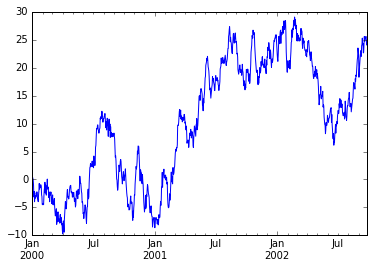

In [97]:
%matplotlib inline
ts.plot()

On DataFrame, `plot()` is a convenience to plot all of the columns with labels:

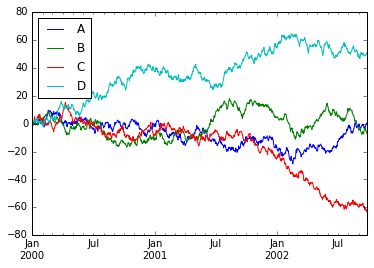

In [98]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])
   .....: 

df = df.cumsum()

%matplotlib inline
plt.figure(); df.plot(); plt.legend(loc='best')

# Getting Data In/Out
## CSV

[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [100]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [101]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.006537,0.604631,-0.221758,1.333563
1,2000-01-02,1.143346,-1.719800,-1.014132,2.698654
2,2000-01-03,1.210209,-1.192515,-0.152721,2.631419
3,2000-01-04,1.850952,-1.115365,1.052886,2.418375
4,2000-01-05,1.264911,1.438899,1.317687,1.412050
5,2000-01-06,0.677553,1.391657,1.350786,1.364724
6,2000-01-07,0.485865,0.862524,2.441316,1.412291
7,2000-01-08,1.544192,2.025094,4.862117,2.361786
8,2000-01-09,-0.530123,1.711885,2.994446,0.876483
9,2000-01-10,-0.955006,0.329703,2.935396,2.830649


## HDF5

Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [104]:
## df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [106]:
## pd.read_hdf('foo.h5','df')

## Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [107]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [108]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,0.006537,0.604631,-0.221758,1.333563
2000-01-02,1.143346,-1.719800,-1.014132,2.698654
2000-01-03,1.210209,-1.192515,-0.152721,2.631419
2000-01-04,1.850952,-1.115365,1.052886,2.418375
2000-01-05,1.264911,1.438899,1.317687,1.412050
2000-01-06,0.677553,1.391657,1.350786,1.364724
2000-01-07,0.485865,0.862524,2.441316,1.412291
2000-01-08,1.544192,2.025094,4.862117,2.361786
2000-01-09,-0.530123,1.711885,2.994446,0.876483
2000-01-10,-0.955006,0.329703,2.935396,2.830649


# Gotchas
If you are trying an operation and you see an exception like:
<pre>    
&gt;&gt;&gt; if pd.Series([False, True, False]):
    print("I was true")
Traceback
    ...

ValueError: The truth value of an array is ambiguous. Use a.empty, a.any() or a.all().
</pre>

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.